In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/faithful.csv")
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [ ]:
df.shape

(272, 3)

eruption is in minutes

waiting is in seconds

we are here to find any pattern over here

no target variable


In [ ]:
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [ ]:
df.isnull().sum()

eruptions    0
waiting      0
dtype: int64

In [ ]:
df=df.drop_duplicates()

Text(0.5, 1.0, 'visualization of raw data')

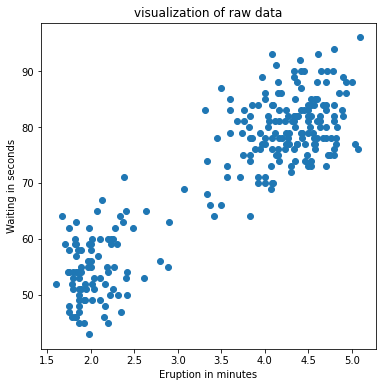

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel("Eruption in minutes")
plt.ylabel("Waiting in seconds")
plt.title("visualization of raw data")

no encoding

here we are not predicting any pattern so no need to split the data


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_std=scaler.fit_transform(df)

simple k means algo

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2) #2 groups
km.fit(x_std)

KMeans(n_clusters=2)

In [ ]:
final_centeroid=km.cluster_centers_
final_centeroid

array([[ 0.7008229 ,  0.6661763 ],
       [-1.27072284, -1.20790208]])

In [ ]:
km.labels_   #which centeroid it belong to

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

In [ ]:
km.inertia_             #no baseline  value for inertia

78.02178667251049

Text(0.5, 1.0, 'visualization of clustered data')

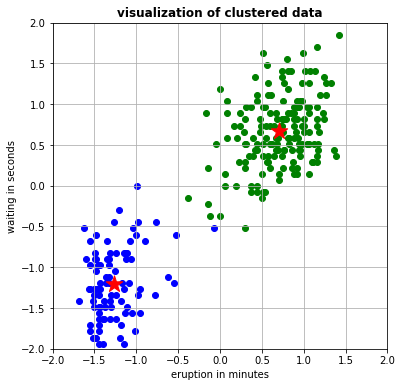

In [ ]:
fig,ax =plt.subplots(figsize=(6,6))
plt.scatter(x_std[km.labels_==0,0],x_std[km.labels_==0,1],c='green',label='cluster 1')
plt.scatter(x_std[km.labels_==1,0],x_std[km.labels_==1,1],c='blue',label='cluster 2')
plt.scatter(final_centeroid[:,0],final_centeroid[:,1],marker='*',s=300,c='red',label='centeroid')
plt.legend
plt.grid()
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel("eruption in minutes")
plt.ylabel("waiting in seconds")
plt.title("visualization of clustered data",fontweight='bold')

Text(0.5, 1.0, 'visualization of clustered data')

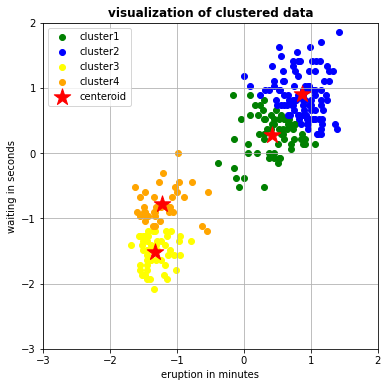

In [ ]:
km=KMeans(n_clusters=4) #2 groups
km.fit(x_std)
final_centeroids=km.cluster_centers_
km.labels_
km.inertia_

fig,ax=plt.subplots(figsize=(6,6))
plt.scatter(x_std[km.labels_ == 0,0],x_std[km.labels_==0,1],c='green',label='cluster1')
plt.scatter(x_std[km.labels_ == 1,0],x_std[km.labels_==1,1],c='blue',label='cluster2')
plt.scatter(x_std[km.labels_ == 2,0],x_std[km.labels_==2,1],c='yellow',label='cluster3')
plt.scatter(x_std[km.labels_ == 3,0],x_std[km.labels_==3,1],c='orange',label='cluster4')
plt.scatter(final_centeroids[:,0],final_centeroids[:,1],marker='*',s=300,c='red',label='centeroid')
plt.grid()
plt.legend()
plt.xlim([-3,2])
plt.ylim([-3,2])
plt.xlabel("eruption in minutes")
plt.ylabel("waiting in seconds")
plt.title("visualization of clustered data",fontweight='bold')


determining k value

In [ ]:
inertias=[]
k_value=list(range(1,10))
for k in k_value:
  km=KMeans(n_clusters=k)
  km.fit(x_std)
  inertias.append(km.inertia_)

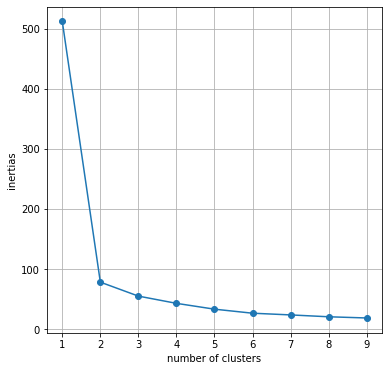

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(k_value,inertias,'-o')
plt.xlabel("number of clusters")
plt.ylabel("inertias")
plt.grid()

the sharp point in the graph which is the best value of k here k=2 is the best value
